<a href="https://colab.research.google.com/github/bm35b/Blog/blob/master/data_exploration.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Survey123 data exploration 

Goals of this notebook:

- Load up the Survey123 data, and take a look at it
- Get familiar with [`pandas`](https://pandas.pydata.org/), a library for data exploration in python
- Make some plots of the data

In [ ]:
%matplotlib inline

import matplotlib.pyplot as plt
import pandas as pd

### Loading the data

The cell below creates some variable - `data` - which contains all the data.

`.head()` tells `python` "show me the first few rows of this data" - so we can quickly check that it looks like what we expect.

In [ ]:
url='https://drive.google.com/file/d/1bayMcfy2Iw_SqyeWTmyscAMzPGx2JBaf/view?usp=sharing'
url='https://drive.google.com/uc?id=' + url.split('/')[-2]
data = pd.read_csv(url)

# the url is only necessary because the file is on google drive. If I
# had it saved on my computer then I could just do the following:
# `data = pd.read_csv("survey_0.csv")`
len(data)

273

In [ ]:
data.head()

,ObjectID,GlobalID,CreationDate,Creator,EditDate,Editor,Your name,What is the date and time of collection?,Where are you recording the point?,"Are there no crops (fallow or pasture), one crop, or multiple crops growing in the field?",Which crop(s) are present in the field?,Other - Which crop(s) are present in the field?,"[OPTIONAL] If you selected multiple crops in the previous question, is there a dominant crop?","Other - [OPTIONAL] If you selected multiple crops in the previous question, is there a dominant crop?",[OPTIONAL] Additional notes,x,y
0,1,91f4ba6f-7786-4fc9-b173-d13f2bd95228,1/10/2023 8:11:20 PM,NASAHarvest_UofMD,1/10/2023 8:11:20 PM,NASAHarvest_UofMD,Ivan Z,1/10/2023 8:04:00 PM,On the edge of the field,Fallow,NaN,NaN,NaN,NaN,NaN,-111.926638,33.368374
1,2,e0390d4d-8cdf-4651-b377-e5037dd7f5d6,1/17/2023 5:45:17 PM,NASAHarvest_UofMD,1/17/2023 5:45:17 PM,NASAHarvest_UofMD,Hannah Kerner,NaN,On the edge of the field,Multiple crops,"niu_(coconut),pineapple",NaN,NaN,NaN,NaN,-111.926715,33.368422
2,3,c68383f6-69d5-4fc9-bb4b-fd27e7fe105d,1/17/2023 6:52:00 PM,NASAHarvestCollector_UofMD,1/17/2023 6:52:00 PM,NASAHarvestCollector_UofMD,Hannah,NaN,Inside the field,One crop,`ulu_(breadfruit),NaN,NaN,NaN,NaN,-111.926731,33.368394
3,4,ec1491e5-2199-46ad-8423-25115326e2d2,1/17/2023 6:52:04 PM,NASAHarvestCollector_UofMD,1/17/2023 6:52:04 PM,NASAHarvestCollector_UofMD,Hannah,NaN,Inside the field,One crop,mai`a_(banana),NaN,NaN,NaN,NaN,-111.926730,33.368374
4,5,66e0706a-cf80-49f6-92a3-e788bc1d003f,1/17/2023 9:10:44 PM,NASAHarvestCollector_UofMD,1/17/2023 9:10:44 PM,NASAHarvestCollector_UofMD,Gabriel Tseng,NaN,On the edge of the field,Pasture,NaN,NaN,NaN,NaN,NaN,-156.343561,20.883135


### Basic manipulations using `pd` functions

Just like a spreadsheet or a table, we can break the `data` object into rows and columns. We can isolate columns using the following code:

```python

data["<NAME OF COLUMN>"]

```

In [ ]:
data["Your name"]

0                Ivan Z
1        Hannah Kerner 
2                Hannah
3                Hannah
4         Gabriel Tseng
             ...       
268    Carter Rosenthal
269    Carter Rosenthal
270    Carter Rosenthal
271    Carter Rosenthal
272    Carter Rosenthal
Name: Your name, Length: 273, dtype: object

Or a row. Here we use `iloc`, short for "index location":

```python
data.iloc[<INDEX NUMBER>]
```

In [ ]:
data.iloc[100]

ObjectID                                                                                                                                  101
GlobalID                                                                                                 71c6838f-b1f2-44c3-b1d9-1939cda3f63f
CreationDate                                                                                                              2/5/2023 1:19:40 AM
Creator                                                                                                                                   NaN
EditDate                                                                                                                  2/5/2023 1:19:40 AM
Editor                                                                                                                                    NaN
Your name                                                                                                                         Mary Alleca
What i

As we discussed in person, each row here maps to a point on Google Earth:

In [ ]:
lat, lon = data.iloc[100].y, data.iloc[100].x
gmap_url = "http://maps.google.com/maps?z=12&t=k&q=loc:"
print(f"Google maps: {gmap_url}{lat}+{lon}")

Google maps: http://maps.google.com/maps?z=12&t=k&q=loc:20.82884508+-156.50052809


A useful function when looking at columns is `.unique`, which tells you the unique values in a column:

In [ ]:
data["Your name"].unique()

array(['Ivan Z', 'Hannah Kerner ', 'Hannah', 'Gabriel Tseng', 'akw',
       'Catherine Nakalembe', 'Jacob Adler', 'H', 'Kerner',
       'Nicolette van der Lee', 'Nick adams ', 'Jeffrey wayer',
       'Paige Moffitt', 'Dylan Bowen ', 'Charlotte Cabaccang',
       'Joshua D Hinau - Nanod', 'jerry isdale', 'Sean McCormick',
       'Rohan Fahland', 'Anna Galbreath ', 'Anna Galbreath',
       'Brigette Tomas ', 'Hannah Kerner', 'Jake Adler',
       'Kira Kai Yamazaki-Gray', 'Miliopuna Davis', 'Kahakuhailoa Poepoe',
       'Wailana ', 'Wailana', 'Kairee ', 'Kairee', 'Joshua D Hinau-Nanod',
       'Brigette Tomas', 'Nicholas Adams', 'jerr isdale', 'Sean',
       'Paige Moffitt ', 'Dustin Palos', 'Julian Marcus Boone-Rogers',
       'Julian Boone', 'Mary Alleca', 'Jeffrey Wayer', 'Jeffrey wayer ',
       'Nick Adams', 'Pono Fortune', 'jerryisfale', 'Olivia Gray',
       'pono fortunr', 'jerry isfale', 'CWC', 'Cwc', 'Anna G',
       'Mary Alleca0', 'Mary Alleca0+', 'Michele Weinhouse', 'Aubrey'

❗️Task❗️: How might I figure out what the unique field types are in the data?

The correct output is:

```
['Fallow', 'Multiple crops', 'One crop', 'Pasture', 'Home garden or irregular', 'Windbreak']
```

*hint*: This data is captured in a column with the following name: `"Are there no crops (fallow or pasture), one crop, or multiple crops growing in the field?"`

In [ ]:
# Your code here

Another useful thing I can do with the `data` is to **filter** it. Let's say I only want data points that I have collected:

In [ ]:
my_points = data[data["Your name"] == "Gabriel Tseng"]

In [ ]:
my_points

,ObjectID,GlobalID,CreationDate,Creator,EditDate,Editor,Your name,What is the date and time of collection?,Where are you recording the point?,"Are there no crops (fallow or pasture), one crop, or multiple crops growing in the field?",Which crop(s) are present in the field?,Other - Which crop(s) are present in the field?,"[OPTIONAL] If you selected multiple crops in the previous question, is there a dominant crop?","Other - [OPTIONAL] If you selected multiple crops in the previous question, is there a dominant crop?",[OPTIONAL] Additional notes,x,y
4,5,66e0706a-cf80-49f6-92a3-e788bc1d003f,1/17/2023 9:10:44 PM,NASAHarvestCollector_UofMD,1/17/2023 9:10:44 PM,NASAHarvestCollector_UofMD,Gabriel Tseng,NaN,On the edge of the field,Pasture,NaN,NaN,NaN,NaN,NaN,-156.343561,20.883135
9,10,794b6ff3-a692-428c-8b41-336ff5855639,1/27/2023 2:27:59 AM,NASAHarvestCollector_UofMD,1/27/2023 2:27:59 AM,NASAHarvestCollector_UofMD,Gabriel Tseng,NaN,On the edge of the field,Pasture,NaN,NaN,NaN,NaN,NaN,-156.343293,20.883176
30,31,ba2fd34e-9777-4f09-ac59-d761aa2675f4,1/31/2023 4:04:24 AM,NASAHarvestCollector_UofMD,1/31/2023 4:04:24 AM,NASAHarvestCollector_UofMD,Gabriel Tseng,NaN,Inside the field,Multiple crops,other,NaN,NaN,NaN,Jackfruit,-156.302448,20.914283
177,178,49e8d9d2-e3c8-4ba1-bf46-9d5aa2a8b547,2/15/2023 7:15:26 PM,NASAHarvestCollector_UofMD,2/15/2023 7:15:26 PM,NASAHarvestCollector_UofMD,Gabriel Tseng,NaN,Inside the field,One crop,macadamia_nut,NaN,NaN,NaN,NaN,-157.048827,21.166240
178,179,16236493-b468-4898-b4cc-3dcd3420ace5,2/15/2023 7:15:34 PM,NASAHarvestCollector_UofMD,2/15/2023 7:15:34 PM,NASAHarvestCollector_UofMD,Gabriel Tseng,NaN,Inside the field,One crop,tropical_fruits,NaN,NaN,NaN,mango,-157.047812,21.166447


What's going on in this code?

Some of it looks familiar:

```python
my_points = data[<SOMETHING>]
```
where
```python
<SOMETHING> = <data["Your name"] == "Gabriel Tseng">
```
So what does this something look like? 

In [ ]:
data["Your name"] == "Gabriel Tseng"

0      False
1      False
2      False
3      False
4       True
       ...  
268    False
269    False
270    False
271    False
272    False
Name: Your name, Length: 273, dtype: bool

Its a list with lots of values saying `True` or `False`. It tells me whether or not a row matches the condition - where it says `True`, then that row's `"Your name"` column does equal `"Gabriel Tseng"`.

So when I give pandas this list, `data[<A True/False LIST>]`, I am telling pandas "keep the rows where its `True`, and remove those where its not.

❗️Task❗️: Isolate the points that you have collected

In [ ]:
# your code here

### Plotting

Being able to visually look at the data - just like Hannah did in the slides earlier - is a really helpful way to quickly get a feel for the entire dataset.

This might help you better understand which columns you want to filter against, for example.

How many points per field type have we collected?

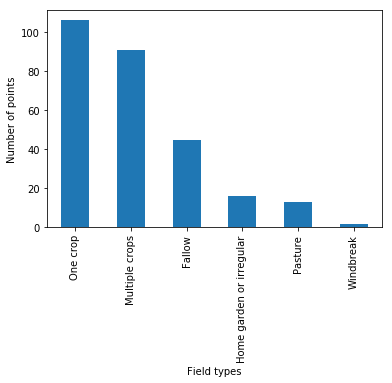

In [ ]:
column_name = "Are there no crops (fallow or pasture), one crop, or multiple crops growing in the field?"
ax = data[column_name].value_counts().plot(kind='bar')
ax.set_xlabel("Field types")
ax.set_ylabel("Number of points")
plt.show()